In [ ]:
# PCA

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
%matplotlib inline


# import data of the features
density = pd.read_csv('density_per_grid_20181101_d1_0800_0830.csv')  
speed = pd.read_csv('speeds_per_grid_20181101_d1_0800_0830.csv')  
display(density)
display(speed)

,E_id,N_id,0,1,2,3,4,5,6,7,...,20,21,22,23,24,25,26,27,28,29
0,17,4,4.0,0.0,0.0,4.0,0.0,0.0,4.0,1.0,...,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,5,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18,5,4.0,0.0,0.0,4.0,0.0,0.0,3.0,1.0,...,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19,5,7.0,3.0,6.0,13.0,8.0,4.0,7.0,6.0,...,3.0,7.0,15.0,8.0,1.0,2.0,1.0,0.0,0.0,0.0
4,20,5,8.0,10.0,14.0,26.0,21.0,9.0,16.0,20.0,...,12.0,12.0,26.0,22.0,11.0,11.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,4,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,4,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,18,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
170,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,E_id,N_id,0,1,2,3,4,5,6,7,...,20,21,22,23,24,25,26,27,28,29
0,17,4,3.500943,30.000000,30.000000,3.152746,30.000000,30.000000,3.909088,4.171068,...,3.201624,3.340267,2.891704,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0000
1,17,5,3.426219,30.000000,30.000000,3.546444,30.000000,30.000000,3.494813,4.764625,...,30.000000,3.975829,3.106391,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0000
2,18,5,2.699297,30.000000,30.000000,2.921112,30.000000,30.000000,3.528561,3.128052,...,3.008006,2.771123,2.499788,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0000
3,19,5,3.812633,6.838642,0.999135,2.768630,9.937075,11.788858,3.985765,2.723077,...,13.682974,1.801045,1.785138,8.215312,8.777792,8.796244,4.896585,30.0,30.0,30.0000
4,20,5,5.796439,6.040781,9.358201,6.049872,8.851218,11.065114,8.769511,4.853969,...,4.080051,3.302822,5.121793,4.888312,3.293297,3.779529,0.470854,0.0,0.0,0.0363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,4,21,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0000
168,4,16,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0000
169,18,6,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,2.560802,30.000000,30.000000,30.0,30.0,30.0000
170,2,20,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,9.047117,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0000


In [ ]:
# Create dataset with the two different features
def time(t):
    # create lists
    Eloc = []
    Nloc = []
    feature1 = []    # Speed
    feature2 = []    # Density

    for i in range(len(speed)):
        # select values which are not nan
        if speed.iloc[:,t+2].isnull().iloc[i] == False & density.iloc[:,t+2].isnull().iloc[i] == False:
                Eloc.append(speed.iloc[i,0])
                Nloc.append(speed.iloc[i,1])
                feature1.append(speed.iloc[i,t+2])
                feature2.append(density.iloc[i,t+2])
       
    # New dataset containing location and features
    data = {'Eloc': Eloc,
            'Nloc': Nloc,
            'Feature1_speed': feature1,
            'Feature2_density': feature2}
    return pd.DataFrame(data)

In [ ]:
# Select dataset of time interval 0
def PCA_calculation(data, f1='Feature1_speed', f2='Feature2_density'):
# ''' data is the time function, which is a dataset which contains the location and the different features '''
    ###########
    ### PCA ###
    ###########
    # Create dataset with only the features
    f_n = data.drop(columns=['Eloc', 'Nloc'])
    
    # Normalization
    std_features = StandardScaler().fit_transform(features0)

    # PCA 
    pca = PCA(n_components=2)

    # Calculate principal components (new information obtained from the 2 features)
    principalComponents = pca.fit_transform(std_features)
    PCA_components = pd.DataFrame(principalComponents)
    data['PCA0'] = PCA_components.iloc[:,0]
    data['PCA1'] = PCA_components.iloc[:,1]

    # Create model using PCA
    model = KMeans(n_clusters=8)
    model.fit(PCA_components)
    label = model.predict(PCA_components)

    # Add label to table
    data['label'] = label
    
    #############################################
    ### Add a meaningful value to the dataset ###
    #############################################
    # Replace the 'old' nan values with NaN
    f_n[f1] = f_n[f1].replace(30, np.nan)
    [f_n[col].update((f_n[col] - f_n[col].min()) / (f_n[col].max() - f_n[col].min())) for col in f_n.columns]
    f_n['Transform'] = 1 - f_n[f1] 
    f_n['Average_norm'] = (f_n['Transform'] + f_n[f2])/2
    f_n = f_n.fillna(2)

    # Add the average of the normalized features to the data
    data['Value'] = f_n['Average_norm']
    return data

In [ ]:
display(PCA_calculation(time(0)))

,Eloc,Nloc,Feature1_speed,Feature2_density,PCA0,PCA1,label,Value
0,17,4,3.500943,4.0,1.407916,-0.486262,6,0.480084
1,17,5,3.426219,4.0,1.406150,-0.485522,6,0.482892
2,18,5,2.699297,4.0,1.388977,-0.478324,6,0.510213
3,19,5,3.812633,7.0,1.586394,0.055575,4,0.539798
4,20,5,5.796439,8.0,1.690297,0.217572,1,0.489047
...,...,...,...,...,...,...,...,...
167,4,21,30.000000,0.0,-1.972939,0.116762,0,2.000000
168,4,16,30.000000,0.0,-1.972939,0.116762,0,2.000000
169,18,6,30.000000,0.0,-1.972939,0.116762,0,2.000000
170,2,20,30.000000,0.0,-1.972939,0.116762,0,2.000000


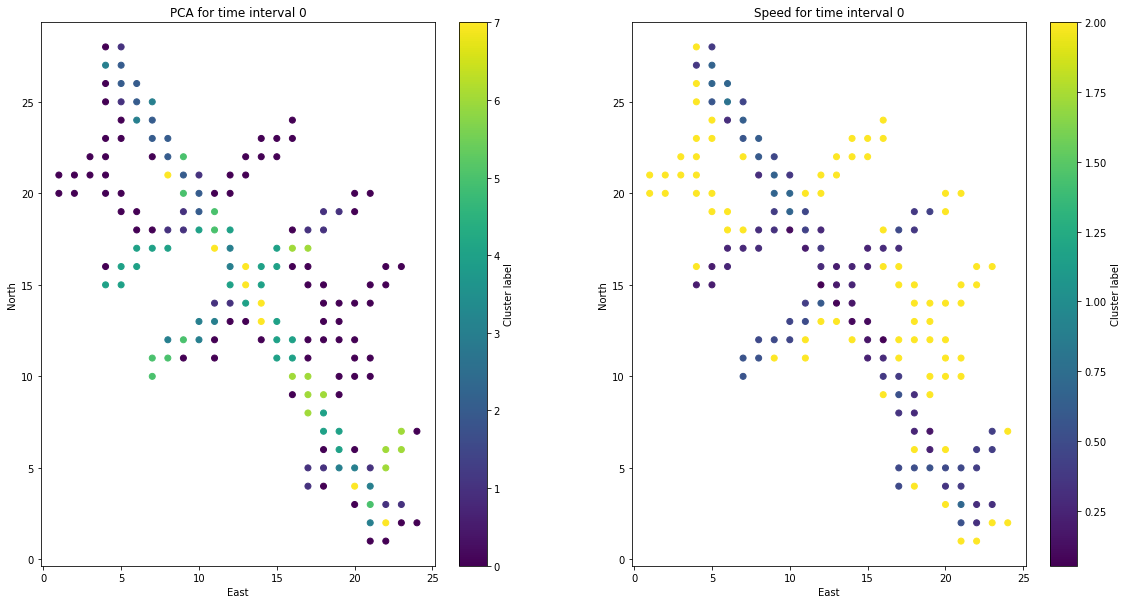

In [ ]:
  plt.figure(figsize=(30,10))
  plt.subplot(1,3,1)
  plt.scatter(data['Eloc'], data['Nloc'], c=data['label'])#, cmap=cmSpeed, vmin=0, vmax=18)
  plt.title('PCA for time interval 0')
  plt.ylabel('North')
  plt.xlabel('East')
  cbar = plt.colorbar()
  cbar.set_label('Cluster label'); 

  plt.subplot(1,3,2)
  plt.scatter(data['Eloc'], data['Nloc'], c=features0['Average_norm'])#, cmap=cmSpeed, vmin=0, vmax=18)
  plt.title('Time interval 0')
  plt.ylabel('North')
  plt.xlabel('East')
  cbar = plt.colorbar()
  cbar.set_label('Cluster label'); 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc8bb720-d815-4ecd-8bea-56e83d6bf798' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>